In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import datetime as dt
import seaborn as sns
from optbinning import OptimalBinning


In [27]:
#Corremos el ejercicio 1 de la tarea anterior.
%run ../Tarea_1./Tarea1_ej1.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id_              50000 non-null  int64         
 1   _id2_             50000 non-null  int64         
 2   comp_mixto1       50000 non-null  float64       
 3   inversion         50000 non-null  float64       
 4   fecha_inicio      50000 non-null  datetime64[ns]
 5   comp_interno1     50000 non-null  float64       
 6   comp_interno2     50000 non-null  object        
 7   comp_interno3     50000 non-null  float64       
 8   comp_interno4     50000 non-null  float64       
 9   categoria1        50000 non-null  float64       
 10  categoria2        50000 non-null  float64       
 11  categoria3        50000 non-null  float64       
 12  comp_externo1     47831 non-null  float64       
 13  comp_externo2     44410 non-null  float64       
 14  comp_externo3     4999

<ipython-input-27-0d46a4e85529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['porc_inv'] = final['inversion'] / tot_inv


In [28]:
#Creamos una copia de la tabla final_1 del ejercicio 1 de la tarea anterior.
copy_final_1 = final_1.copy()
copy_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             50000 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        50000 non-null  float64       
 3   porc_inv         50000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [29]:
#Creamos una nueva tabla sin datos faltantes en las fechas.
datos1 = copy_final_1.dropna()
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id_             49352 non-null  object        
 1   mes_informacion  49352 non-null  datetime64[ns]
 2   inversion        49352 non-null  float64       
 3   porc_inv         49352 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ MB


In [30]:
#Creamos una condición que nos permita filtrar a los clientes que son aptos para recibir el crédito.
mask = ((datos1['porc_inv'] > np.percentile(datos1['porc_inv'], 90)) | (mini & maxi ) )

In [31]:
#Creamos un indicador para marcar a los clientes aptos para el crédito y los que no.
datos1['target'] = 0 #No aptos.
datos1.loc[mask,'target'] = 1 #Aptos.

<ipython-input-31-79800bf3224b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['target'] = 0 #No aptos.
C:\Users\jonat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
#Las fechas las separamos de tal forma que el día, el mes y el año estén cada uno en una columna separada.
datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
datos1['Day'] = datos1['mes_informacion'].dt.day #Día.

<ipython-input-32-e01fcf106195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Year'] = datos1['mes_informacion'].dt.year #Año.
<ipython-input-32-e01fcf106195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['Month'] = datos1['mes_informacion'].dt.month #Mes.
<ipython-input-32-e01fcf106195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [33]:
#Creamos la tabla que utilizaremos para los algoritmos que incluyen los cambios antes mencionados.
rdy_table = datos1[['_id_','Year','Month','Day','inversion','porc_inv','target']]
rdy_table.head()

,_id_,Year,Month,Day,inversion,porc_inv,target
0,78213,2021,5,1,0.000000,0.000000e+00,0
1,76457,2021,5,1,0.041039,1.258548e-08,0
2,40666,2019,5,1,0.000000,0.000000e+00,0
3,8329,2021,5,1,0.000000,0.000000e+00,0
4,68389,2021,5,1,77.422135,2.374342e-05,0


In [34]:
#Hacemos validación y test
X = rdy_table.copy()
y = X.pop('target')

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [35]:
optb_year  = OptimalBinning(name = "Year", dtype = "numerical", solver = "cp")
optb_month = OptimalBinning(name = "Month", dtype = "numerical", solver = "cp")
optb_day   = OptimalBinning(name = "Day", dtype = "numerical", solver = "cp")
optb_inv   = OptimalBinning(name = "inversion", dtype = "numerical", solver = "cp")

columns = ['Year', 'Month', 'Day', 'inversion']
opts    = [optb_year, optb_month, optb_day, optb_inv]

## Para el entrenamiento

In [36]:
optb_year.fit(X_train["Year"].values, y_train)
optb_month.fit(X_train["Month"].values, y_train)
optb_day.fit(X_train["Day"].values, y_train)
optb_inv.fit(X_train["inversion"].values, y_train)

OptimalBinning(name='inversion')

In [37]:
for i in opts:
    display(f"{i}:", i.splits)

"OptimalBinning(name='Year'):"

array([2019.5, 2020.5])

"OptimalBinning(name='Month'):"

array([4.5, 5.5, 9.5])

"OptimalBinning(name='Day'):"

array([], dtype=float64)

"OptimalBinning(name='inversion'):"

array([], dtype=float64)

In [38]:
year_table  = optb_year.binning_table
month_table = optb_month.binning_table
day_table   = optb_day.binning_table
inv_table   = optb_inv.binning_table

In [39]:
display(year_table.build())
display(month_table.build())
display(day_table.build())
display(inv_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 2019.50)",3742,0.094780,3249,493,0.131748,-0.317301,0.010828,0.001348
1,"[2019.50, 2020.50)",2736,0.069299,2434,302,0.110380,-0.11603,0.000977,0.000122
2,"[2020.50, inf)",33003,0.835921,29870,3133,0.094931,0.051969,0.002211,0.000276
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39481,1.000000,35553,3928,0.099491,,0.014016,0.001746


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 4.50)",2935,0.074340,2589,346,0.117888,-0.190306,0.002905,0.000363
1,"[4.50, 5.50)",32146,0.814214,29081,3065,0.095346,0.047143,0.001776,0.000222
2,"[5.50, 9.50)",2299,0.058231,2034,265,0.115268,-0.164864,0.001691,0.000211
3,"[9.50, inf)",2101,0.053215,1849,252,0.119943,-0.209923,0.002550,0.000318
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,39481,1.000000,35553,3928,0.099491,,0.008921,0.001114


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, inf)",39481,1.0,35553,3928,0.099491,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,39481,1.0,35553,3928,0.099491,,0.0,0.0


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, inf)",39481,1.0,35553,3928,0.099491,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,39481,1.0,35553,3928,0.099491,,0.0,0.0


<Figure size 432x288 with 0 Axes>

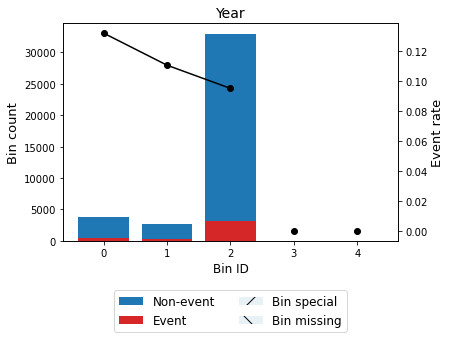

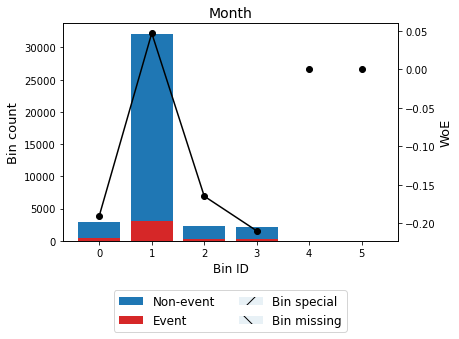

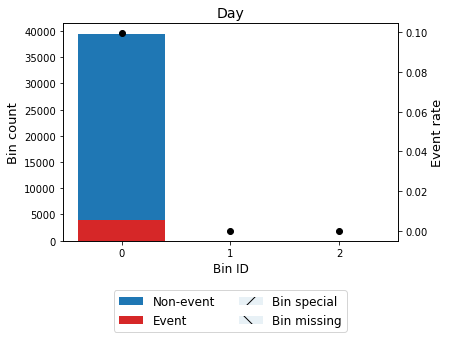

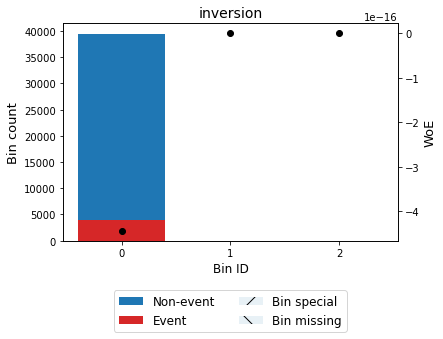

In [40]:
plt.figure()
year_table.plot(metric="event_rate")
month_table.plot(metric="woe")
day_table.plot(metric="event_rate")
inv_table.plot(metric="woe")

<Figure size 432x288 with 0 Axes>

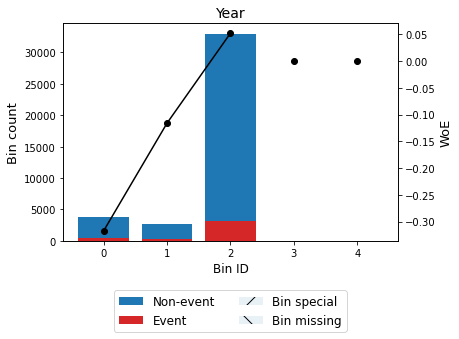

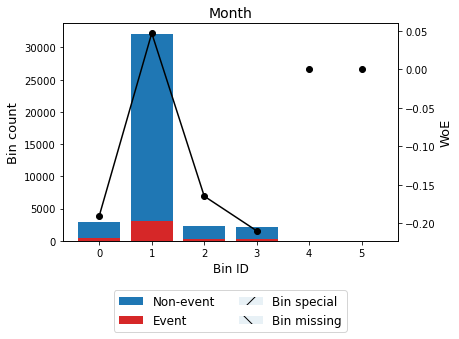

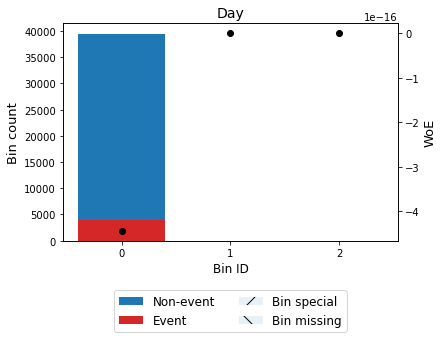

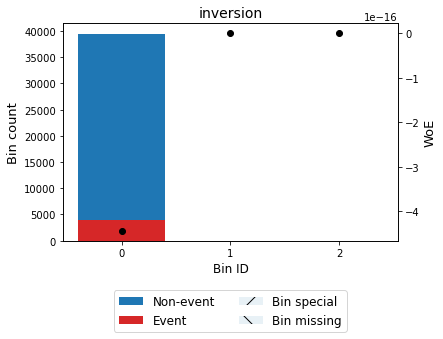

In [41]:
plt.figure()
year_table.plot(metric="woe")
month_table.plot(metric="woe")
day_table.plot(metric="woe")
inv_table.plot(metric="woe")

In [42]:
#Transformamos las variables a woe
X_train["woe_year"]  = optb_year.transform(X_train["Year"], metric="woe")
X_train["woe_month"] = optb_month.transform(X_train["Month"], metric="woe")
X_train["woe_day"]   = optb_day.transform(X_train["Day"], metric="woe")
X_train["woe_inv"]   = optb_inv.transform(X_train["inversion"], metric="woe")

<ipython-input-42-c159af73fad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["woe_year"]  = optb_year.transform(X_train["Year"], metric="woe")
<ipython-input-42-c159af73fad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["woe_month"] = optb_month.transform(X_train["Month"], metric="woe")
<ipython-input-42-c159af73fad1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [43]:
X_train.head()

,_id_,Year,Month,Day,inversion,porc_inv,woe_year,woe_month,woe_day,woe_inv
35836,1011,2021,5,1,0.000000,0.000000,0.051969,0.047143,-4.440892e-16,-4.440892e-16
6876,16898,2021,5,1,0.000000,0.000000,0.051969,0.047143,-4.440892e-16,-4.440892e-16
36983,96875,2021,5,1,184.274772,0.000057,0.051969,0.047143,-4.440892e-16,-4.440892e-16
26663,37915,2021,5,1,19.487316,0.000006,0.051969,0.047143,-4.440892e-16,-4.440892e-16
32355,68829,2021,5,1,0.000000,0.000000,0.051969,0.047143,-4.440892e-16,-4.440892e-16


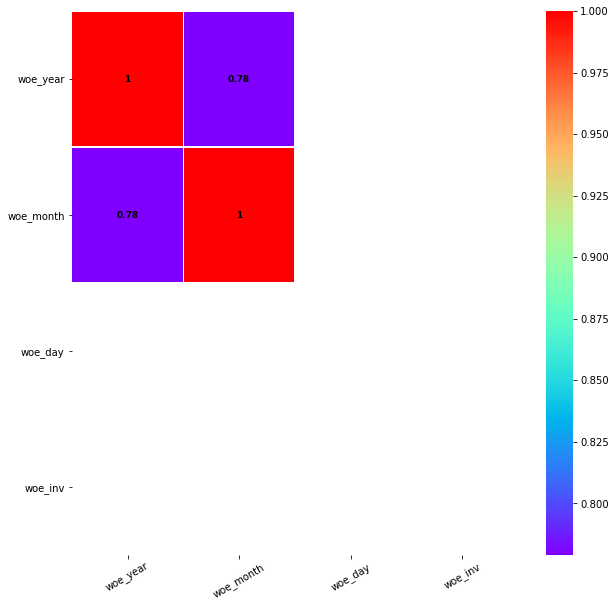

In [44]:
corre = X_train.iloc[ : , 6: ].corr()


xticks = list(corre.index)  
yticks = list(corre.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corre,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,
annot_kws={'size':9,'weight':'bold', 'color':'k'})

ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [45]:
X_woe_train = X_train.iloc[:,6:]
X_woe_train.head()

,woe_year,woe_month,woe_day,woe_inv
35836,0.051969,0.047143,-4.440892e-16,-4.440892e-16
6876,0.051969,0.047143,-4.440892e-16,-4.440892e-16
36983,0.051969,0.047143,-4.440892e-16,-4.440892e-16
26663,0.051969,0.047143,-4.440892e-16,-4.440892e-16
32355,0.051969,0.047143,-4.440892e-16,-4.440892e-16


In [46]:
model = LogisticRegression()
clf = model.fit(X_woe_train, y_train)

y_pred
 [0 0 0 ... 0 0 0]
y_pred1
 [-2.25504601 -2.25504601 -2.25504601 ... -2.25504601 -2.25504601
 -2.25504601]


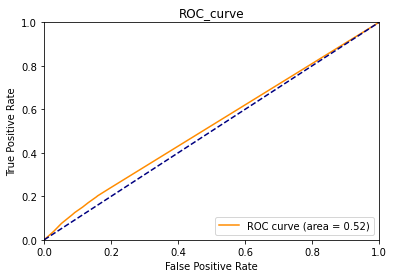

In [47]:
y_pred = clf.predict(X_woe_train)
y_pred1 = clf.decision_function(X_woe_train)
print('y_pred\n', y_pred)
print('y_pred1\n', y_pred1)

#Draw ROC curve and calculate AUC value
fpr, tpr, threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr, tpr)
plot(fpr, tpr, color='darkorange',
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

## Conjunto de datos de prueba

In [48]:
X_woe_test = X_test.iloc[:,6:]
X_woe_train.head()

,woe_year,woe_month,woe_day,woe_inv
35836,0.051969,0.047143,-4.440892e-16,-4.440892e-16
6876,0.051969,0.047143,-4.440892e-16,-4.440892e-16
36983,0.051969,0.047143,-4.440892e-16,-4.440892e-16
26663,0.051969,0.047143,-4.440892e-16,-4.440892e-16
32355,0.051969,0.047143,-4.440892e-16,-4.440892e-16


In [49]:
#Transformamos las variables a woe
X_woe_test["woe_year"]  = optb_year.transform(X_test["Year"], metric="woe")
X_woe_test["woe_month"] = optb_month.transform(X_test["Month"], metric="woe")
X_woe_test["woe_day"]   = optb_day.transform(X_test["Day"], metric="woe")
X_woe_test["woe_inv"]   = optb_inv.transform(X_test["inversion"], metric="woe")

y_pred_test
 [0 0 0 ... 0 0 0]
y_pred1_test
 [-2.25504601 -1.88996758 -2.25504601 ... -2.25504601 -2.25504601
 -2.25504601]


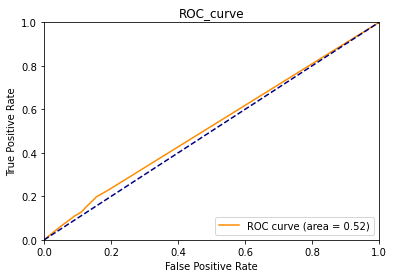

In [51]:
y_pred_test = clf.predict(X_woe_test)
y_pred1_test = clf.decision_function(X_woe_test)
print('y_pred_test\n', y_pred_test)
print('y_pred1_test\n', y_pred1_test)

#Draw ROC curve and calculate AUC value
fpr, tpr, threshold = roc_curve(y_test, y_pred1_test)
roc_auc = auc(fpr, tpr)
plot(fpr, tpr, color='darkorange',
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc = "lower right")
plt.show()